In [1]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN, device=gpu, floatX=float32"

In [2]:
# If using tensorflow, set image dimensions order
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [3]:
import time  
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(2017)

In [4]:
from keras.datasets import mnist #Load MNIST dataset
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print ("Number of training samples: %d"%train_features.shape[0])
print ("Number of test samples: %d"%test_features.shape[0])
print ("Image rows: %d"%train_features.shape[1])
print ("Image columns: %d"%train_features.shape[2])
print ("Number of classes: %d"%num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


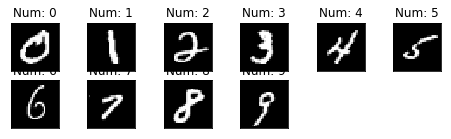

In [5]:
fig = plt.figure(figsize=(8,3))  #Show Examples from Each Class
for i in range(num_classes):
    ax = fig.add_subplot(3, 6, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[1], cmap="gray")
plt.show()

In [6]:
# reshape images to column vectors  #Pre-processing
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
def simple_nn():  #Define a Neural Network Model with a Single Hidden Layer
    # initialize model
    model = Sequential()
    # add an input layer and a hidden layer
    model.add(Dense(100, input_dim = num_input_nodes))
    # add activation layer to add non-linearity
    model.add(Activation('sigmoid'))
    # to add ReLu instead of sigmoid: model.add(Activation('relu'))
    # combine above 2 layers: model.add(Dense(100, input_dim=784),Activation('sigmoid'))
    # add output layer
    model.add(Dense(num_classes))
    # add softmax layer 
    model.add(Activation('softmax'))
    return model

In [8]:
# define model
model = simple_nn()
# define optimizer
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
start = time.time() #Train the model
model_info = model.fit(train_features, train_labels, batch_size=64, nb_epoch=10, verbose=2, validation_split=0.2)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.0894 - acc: 0.1830 - val_loss: 0.0829 - val_acc: 0.2900
Epoch 2/10
 - 3s - loss: 0.0760 - acc: 0.4160 - val_loss: 0.0686 - val_acc: 0.5155
Epoch 3/10
 - 3s - loss: 0.0641 - acc: 0.5544 - val_loss: 0.0591 - val_acc: 0.6086
Epoch 4/10
 - 3s - loss: 0.0564 - acc: 0.6321 - val_loss: 0.0526 - val_acc: 0.6721
Epoch 5/10
 - 4s - loss: 0.0508 - acc: 0.6927 - val_loss: 0.0473 - val_acc: 0.7319
Epoch 6/10
 - 4s - loss: 0.0460 - acc: 0.7403 - val_loss: 0.0427 - val_acc: 0.7712
Epoch 7/10
 - 3s - loss: 0.0419 - acc: 0.7715 - val_loss: 0.0390 - val_acc: 0.7978
Epoch 8/10
 - 3s - loss: 0.0387 - acc: 0.7931 - val_loss: 0.0359 - val_acc: 0.8181
Epoch 9/10
 - 3s - loss: 0.0360 - acc: 0.8088 - val_loss: 0.0335 - val_acc: 0.8309
Epoch 10/10
 - 3s - loss: 0.0338 - acc: 0.8206 - val_loss: 0.0314 - val_acc: 0.8397


In [10]:
def Plot_ME_PLEASE(model_history): #Plot Accuracy or Loss as a Function of Number of Epoch
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [11]:
def accuracy(test_x, test_y, model):  #Test the Model
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [12]:
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 83.77


D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


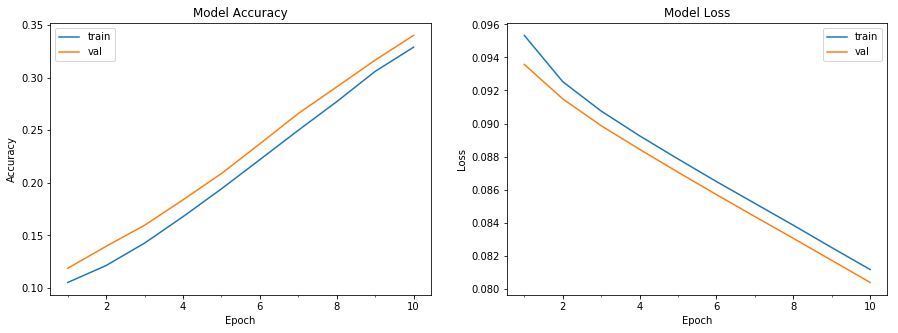

Accuracy on test data is: 34.30


In [13]:
# decrease the learning rate
# define model
model = simple_nn()
# define optimizer
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, \
                       nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
Plot_ME_PLEASE(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


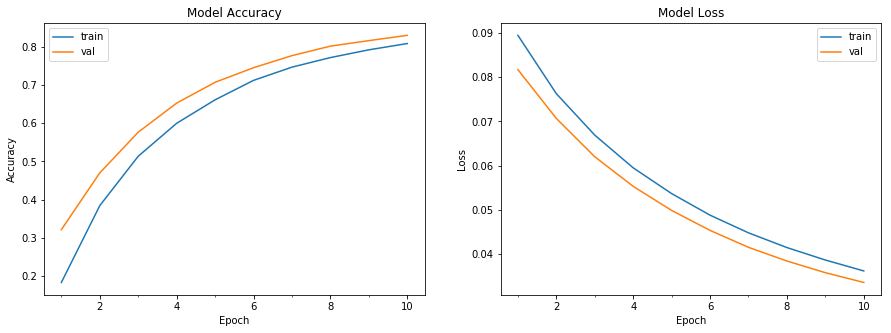

Accuracy on test data is: 82.40


In [14]:
# increase the learning rate
# define model
model = simple_nn()
# define optimizer
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, \
                       nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
Plot_ME_PLEASE(model_info)
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


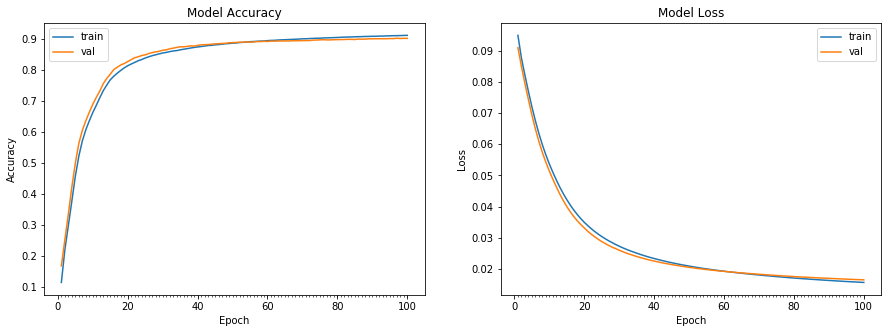

Accuracy on test data is: 89.74


In [15]:
from keras.callbacks import EarlyStopping  #Early Stopping #######################
#define model
model = simple_nn()
# define optimizer
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]
# train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, callbacks=callbacks_list, verbose=0, \
                       validation_split=0.2)
Plot_ME_PLEASE(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))